In [1]:
import os, sys
sys.path.append(os.path.abspath("../src/tf"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from datetime import datetime as dt
from gan import MnistCWGAN
from tensorflow.keras.utils import to_categorical


%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
W0721 18:47:44.384932 140281090828096 deprecation_wrapper.py:119] From /home/michal/Projects/gan/src/tf/gan.py:14: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



In [3]:
run_name = dt.now().strftime("fashion-mnist-cwgangp-%y%m%d%H%M%S")

# TODO:
* ~~mount data as a volume~~
* ~~save/restore model~~
* use docker compose
* generalize code to other datasets
* generalize train method in GAN class

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 128.0 - 1, x_test / 128.0 - 1
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]


In [5]:
tf.reset_default_graph()

In [6]:
sess = tf.Session()
gan = MnistCWGAN(sess, learning_rate=0.0001, name=run_name)
writer = tf.summary.FileWriter('./logs/{}'.format(run_name), sess.graph)

W0721 18:47:49.930367 140281090828096 deprecation_wrapper.py:119] From /home/michal/Projects/gan/src/tf/gan.py:18: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0721 18:47:49.932692 140281090828096 deprecation_wrapper.py:119] From /home/michal/Projects/gan/src/tf/gan.py:236: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 18:47:50.001932 140281090828096 deprecation.py:323] From /home/michal/Projects/gan/src/tf/gan.py:303: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0721 18:47:50.005956 140281090828096 deprecation.py:506] From /home/michal/Projects/gan/venv/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Ca

In [7]:
train_size = 40000
cond = to_categorical(y_train[:train_size])
x = x_train[:train_size]
    

In [11]:
gan.train([x, cond], 10, 64, writer)

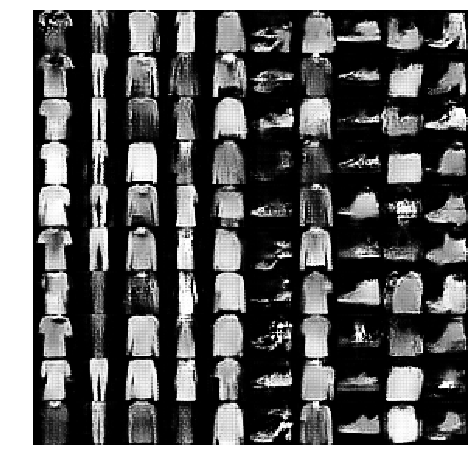

In [12]:
noise = np.random.normal(0, 1, (100, 64))
conditions = to_categorical(
    np.concatenate([np.arange(10) for _ in range(10)]))

images = gan.generate([noise, conditions])

plt.figure(figsize=(10, 8))
plt.imshow(np.concatenate(
    np.concatenate(
        images.reshape(10, 10, 28, 28),
        axis=1
    ),
    axis=1
), cmap="gray")
plt.axis("off")
plt.show()

In [13]:
gan.save("models/{}.ckpt".format(run_name))

W0721 21:47:07.087644 140281090828096 deprecation_wrapper.py:119] From /home/michal/Projects/gan/src/tf/gan.py:74: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.

